In [1]:
library(Seurat)
library(future)
#integration: Install 
library(Matrix)
library(simspec)
library(dplyr)
library(patchwork)
library(patchwork)
library(ggplot2)
library(MetBrewer)
library(Matrix)
library(simspec)

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#Base dir for all datasets
base_dir<-"/cluster/project/treutlein/DATA/sequencing/HB4_10x_timecourse_integrated/"

seurat <- readRDS(paste(base_dir,"Seurat_object_HB4_D11_D16_D21_D30_merge_QC_removed_CC.rds",sep=""))


PC_ 1 
Positive:  DLK1, VIM, NNAT, CDH2, TUBA1A, SIX3, TTYH1, METRN, LINC01551, FZD5 
	   FOXG1, HES5, TTC3, FABP7, PRSS23, COL2A1, ARL4C, HES4, TLE4, LHX2 
	   EPHA4, PLCG2, PRTG, PTN, ZFHX4, PALLD, FRZB, MAP2, MEST, MAP1B 
Negative:  POU5F1, DPPA4, EPCAM, AC106864.1, CLDN6, L1TD1, TDGF1, S100A11, FOXD3-AS1, SEPHS1 
	   TERF1, CD24, KRT18, APOE, DNMT3B, MFGE8, CTSC, PODXL, PMAIP1, UGP2 
	   PGAM1, PFN1, PHC1, AC092490.1, CLDN7, AC009446.1, DMKN, EIF5A, APRT, AP1M2 
PC_ 2 
Positive:  SFRP1, IGFBP5, TPM1, TPBG, MAF, GPC3, PRTG, PRSS23, BST2, ZIC2 
	   LIN28A, GJA1, SESN3, FGFR1, MIAT, RAX, IGFBP3, ID2, DDIT4, CDH11 
	   FZD5, TRIM71, FBN2, PAMR1, CRABP1, SLC5A3, HMGA1, BCL2L11, EIF3A, LTBP1 
Negative:  STMN2, CKB, HMGCS1, TUBB2A, FDFT1, JPT1, PLCG2, IDI1, GAP43, MSMO1 
	   STMN4, ELAVL4, ELAVL3, FDPS, SQLE, TAGLN3, LINC01551, DCC, PCSK1N, HCRT 
	   FGFBP3, FABP5, TTC9B, CPE, DCX, MLLT11, ACAT2, GNG3, RTN1, TPPP3 
PC_ 3 
Positive:  SFRP2, PRSS23, HNRNPM, ID3, HNRNPAB, TPBG, PRTG, SFPQ, S

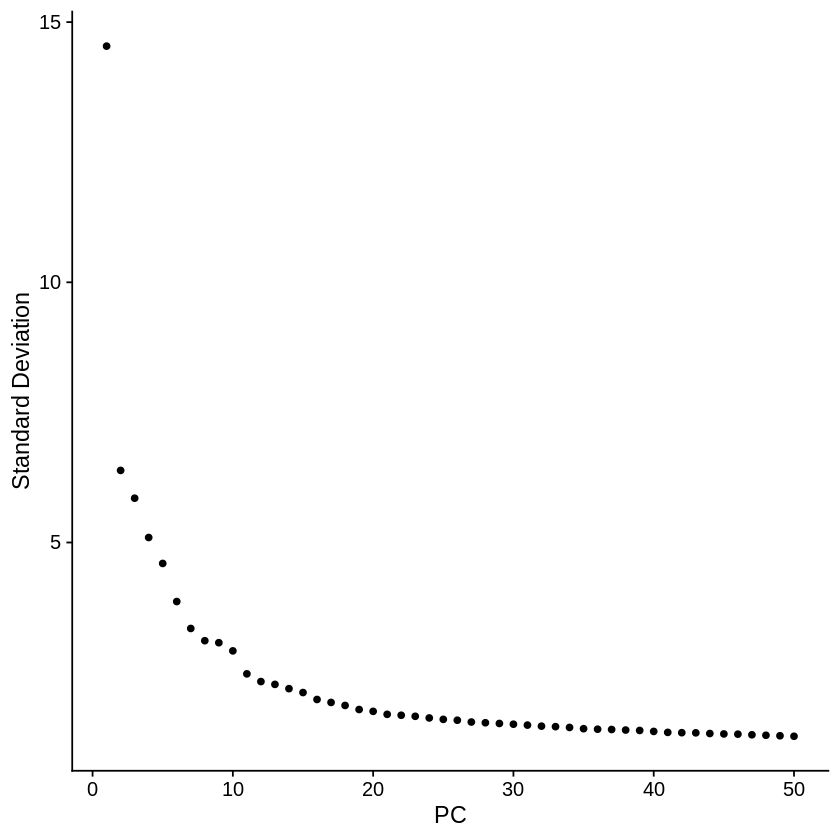

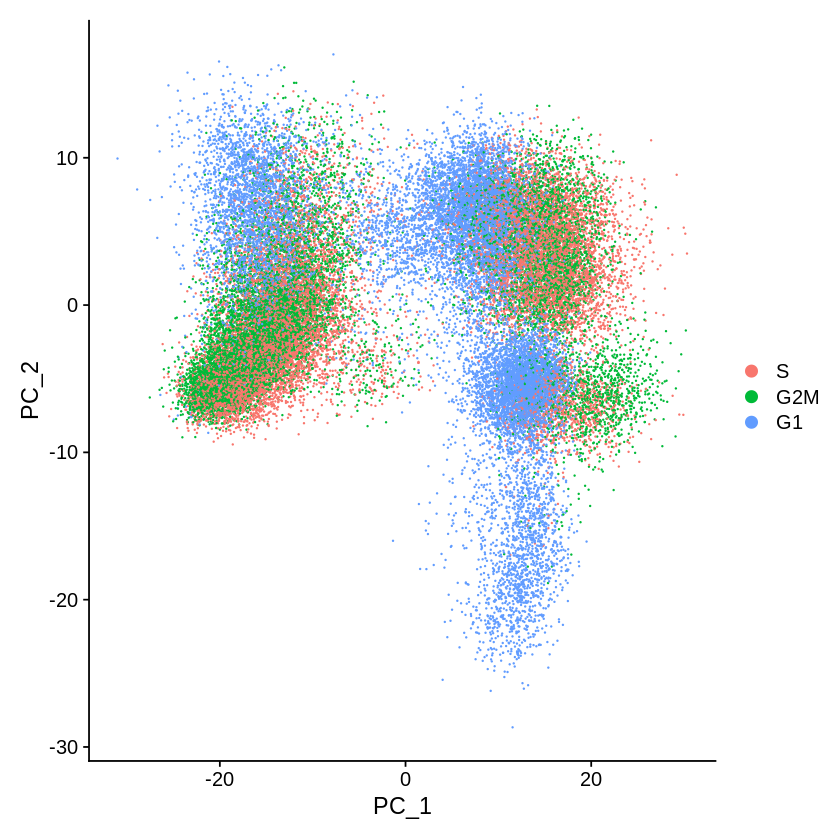

In [3]:
#Reassign seurat_merged
seurat <- RunPCA(seurat, npcs = 50)
ElbowPlot(seurat, ndims = ncol(Embeddings(seurat, "pca")))
DimPlot(seurat)

In [4]:
#Remove all CC genes a bit too Aggressive 
#counts <- GetAssayData(seurat_merged, assay = "RNA")
#counts <- counts[-(which(rownames(counts) %in% cc.genes$g2m.genes)),]
#counts <- counts[-(which(rownames(counts) %in% cc.genes$s.genes)),]
#seurat_merged_co_CC <- subset(seurat_merged, features = rownames(counts))

In [5]:
options(repr.plot.width=18, repr.plot.height=12)

In [6]:
PCHeatmap(seurat, dims = 1:10, cells = 500, balanced = TRUE, ncol = 4)


In [7]:
PCHeatmap(seurat, dims = 10:20, cells = 500, balanced = TRUE, ncol = 4)


In [8]:
# top 20 PCs chosen, min 15, but since we are interested in fine details regarding the ECM, let's go with the max
seurat <- RunPCA(seurat, npcs = 20)


PC_ 1 
Positive:  DLK1, VIM, NNAT, CDH2, TUBA1A, SIX3, TTYH1, METRN, LINC01551, FZD5 
	   FOXG1, HES5, TTC3, FABP7, PRSS23, COL2A1, ARL4C, HES4, TLE4, LHX2 
	   EPHA4, PLCG2, PRTG, PTN, ZFHX4, PALLD, FRZB, MAP2, MEST, MAP1B 
Negative:  POU5F1, DPPA4, EPCAM, AC106864.1, CLDN6, L1TD1, TDGF1, S100A11, FOXD3-AS1, SEPHS1 
	   TERF1, CD24, KRT18, APOE, DNMT3B, MFGE8, CTSC, PODXL, PMAIP1, UGP2 
	   PGAM1, PFN1, PHC1, AC092490.1, CLDN7, AC009446.1, DMKN, EIF5A, APRT, AP1M2 
PC_ 2 
Positive:  SFRP1, IGFBP5, TPM1, TPBG, MAF, GPC3, PRTG, PRSS23, BST2, ZIC2 
	   LIN28A, GJA1, SESN3, FGFR1, MIAT, RAX, IGFBP3, ID2, DDIT4, CDH11 
	   FZD5, TRIM71, FBN2, PAMR1, CRABP1, SLC5A3, HMGA1, BCL2L11, EIF3A, LTBP1 
Negative:  STMN2, CKB, HMGCS1, TUBB2A, FDFT1, JPT1, PLCG2, IDI1, GAP43, MSMO1 
	   STMN4, ELAVL4, ELAVL3, FDPS, SQLE, TAGLN3, LINC01551, DCC, PCSK1N, HCRT 
	   FGFBP3, FABP5, TTC9B, CPE, DCX, MLLT11, ACAT2, GNG3, RTN1, TPPP3 
PC_ 3 
Positive:  IGFBP2, BNIP3, ENO2, STC1, P3H2, FAM162A, PHLDA1, DDIT4,

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:23:59 UMAP embedding parameters a = 0.9922 b = 1.112

10:23:59 Read 41059 rows and found 20 numeric columns

10:23:59 Using Annoy for neighbor search, n_neighbors = 30

10:23:59 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:24:04 Writing NN index file to temp file /scratch/225984182.tmpdir/RtmpV6xDhr/file1260b88a04db

10:24:04 Searching Annoy index using 1 thread, search_k = 3000

10:24:18 Annoy recall = 100%

10:24:18 Commencing smooth kNN distance calibration using 1 thread

10:

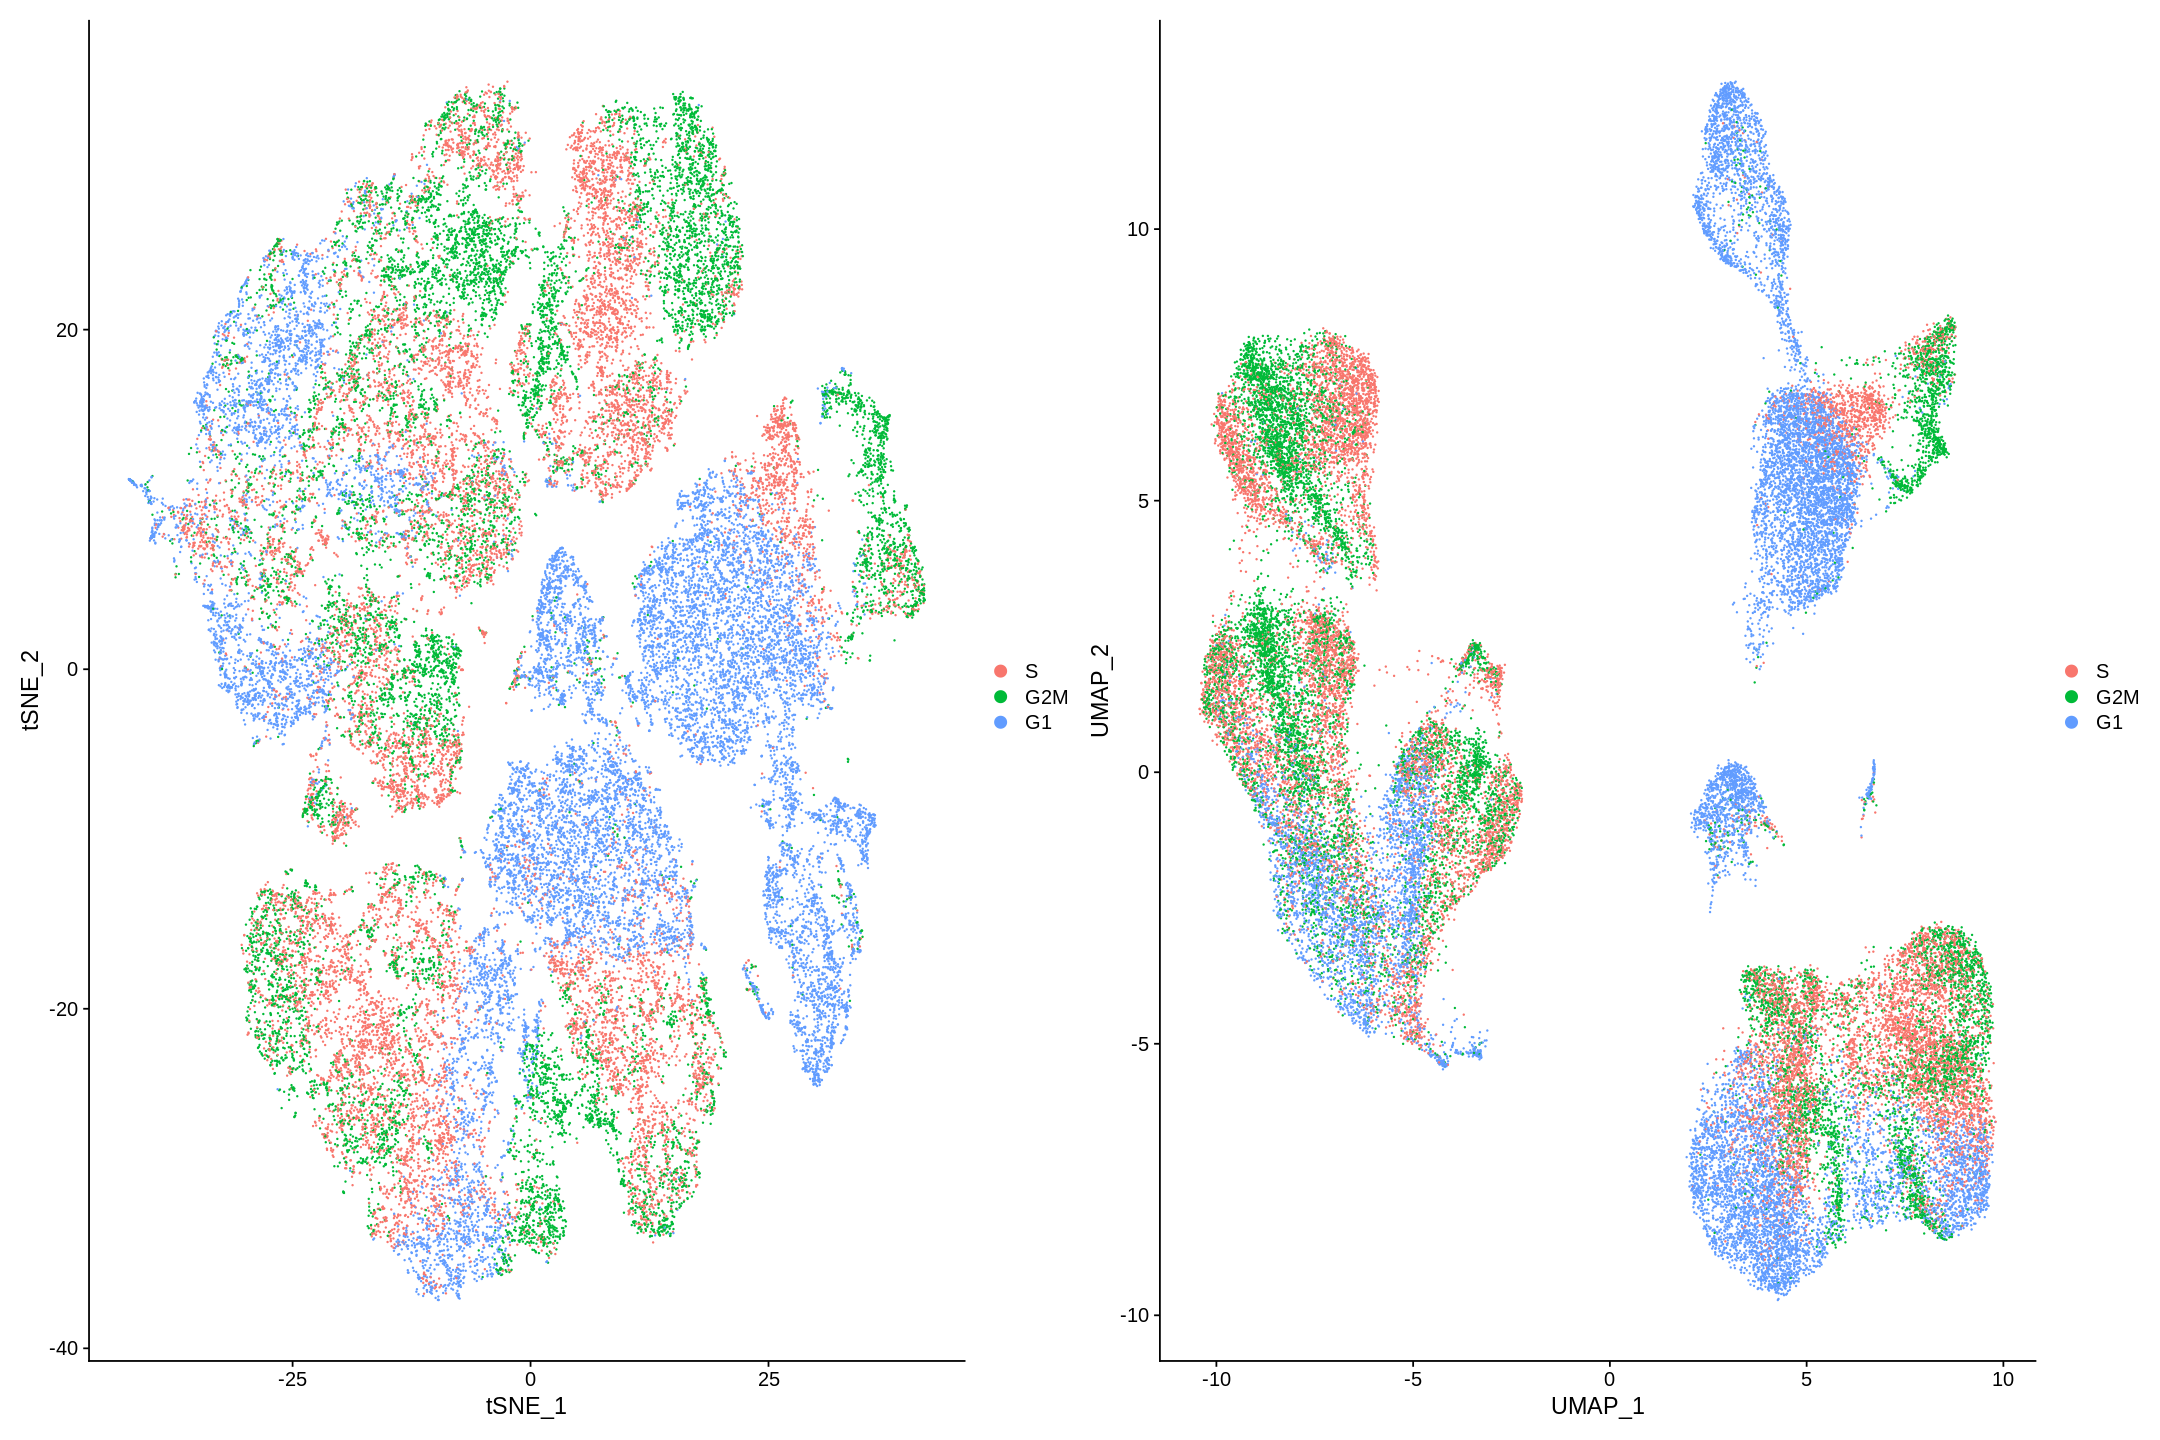

In [9]:
#Check TSNE and UMAP of merged seurat object
seurat <- RunTSNE(seurat, dims = 1:20)
seurat <- RunUMAP(seurat, dims = 1:20)
plot1 <- TSNEPlot(seurat)
plot2 <- UMAPPlot(seurat)
plot1 + plot2

In [10]:
seurat <- FindNeighbors(seurat, dims = 1:20)
seurat <- FindClusters(seurat, resolution = 1)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41059
Number of edges: 1380738

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8809
Number of communities: 21
Elapsed time: 11 seconds


In [11]:
seurat <- cluster_sim_spectrum(seurat, label_tag = "orig.ident", cluster_resolution = 0.6)

Start to do clustering for each sample...
found nearest neighbors.
revoke Seurat to compute SNN.
done.
done. returning result...
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 4912
Number of edges: 178568

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8138
Number of communities: 8
Elapsed time: 0 seconds
>> Done clustering of sample HB4_D11.
found nearest neighbors.
revoke Seurat to compute SNN.
done.
done. returning result...
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6571
Number of edges: 245977

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8005
Number of communities: 8
Elapsed time: 0 seconds
>> Done clustering of sample HB4_D16.
found nearest neighbors.
revoke Seurat to compute SNN.
done.
done. returning result...
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 7962
Number of edges: 288463

Running Lou

In [12]:
seurat <- RunUMAP(seurat, reduction="css", dims = 1:ncol(Embeddings(seurat, "css")))
seurat <- FindNeighbors(seurat, reduction = "css", dims = 1:ncol(Embeddings(seurat, "css"))) %>% FindClusters(resolution = 0.6)


10:31:20 UMAP embedding parameters a = 0.9922 b = 1.112

10:31:20 Read 41059 rows and found 47 numeric columns

10:31:20 Using Annoy for neighbor search, n_neighbors = 30

10:31:20 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:31:24 Writing NN index file to temp file /scratch/225984182.tmpdir/RtmpV6xDhr/file1260b19521571

10:31:24 Searching Annoy index using 1 thread, search_k = 3000

10:31:37 Annoy recall = 100%

10:31:42 Commencing smooth kNN distance calibration using 1 thread

10:31:45 Initializing from normalized Laplacian + noise

10:31:46 Commencing optimization for 200 epochs, with 1675660 positive edges

10:32:32 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41059
Number of edges: 1326786

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9095
Number of communities: 18
Elapsed time: 9 seconds


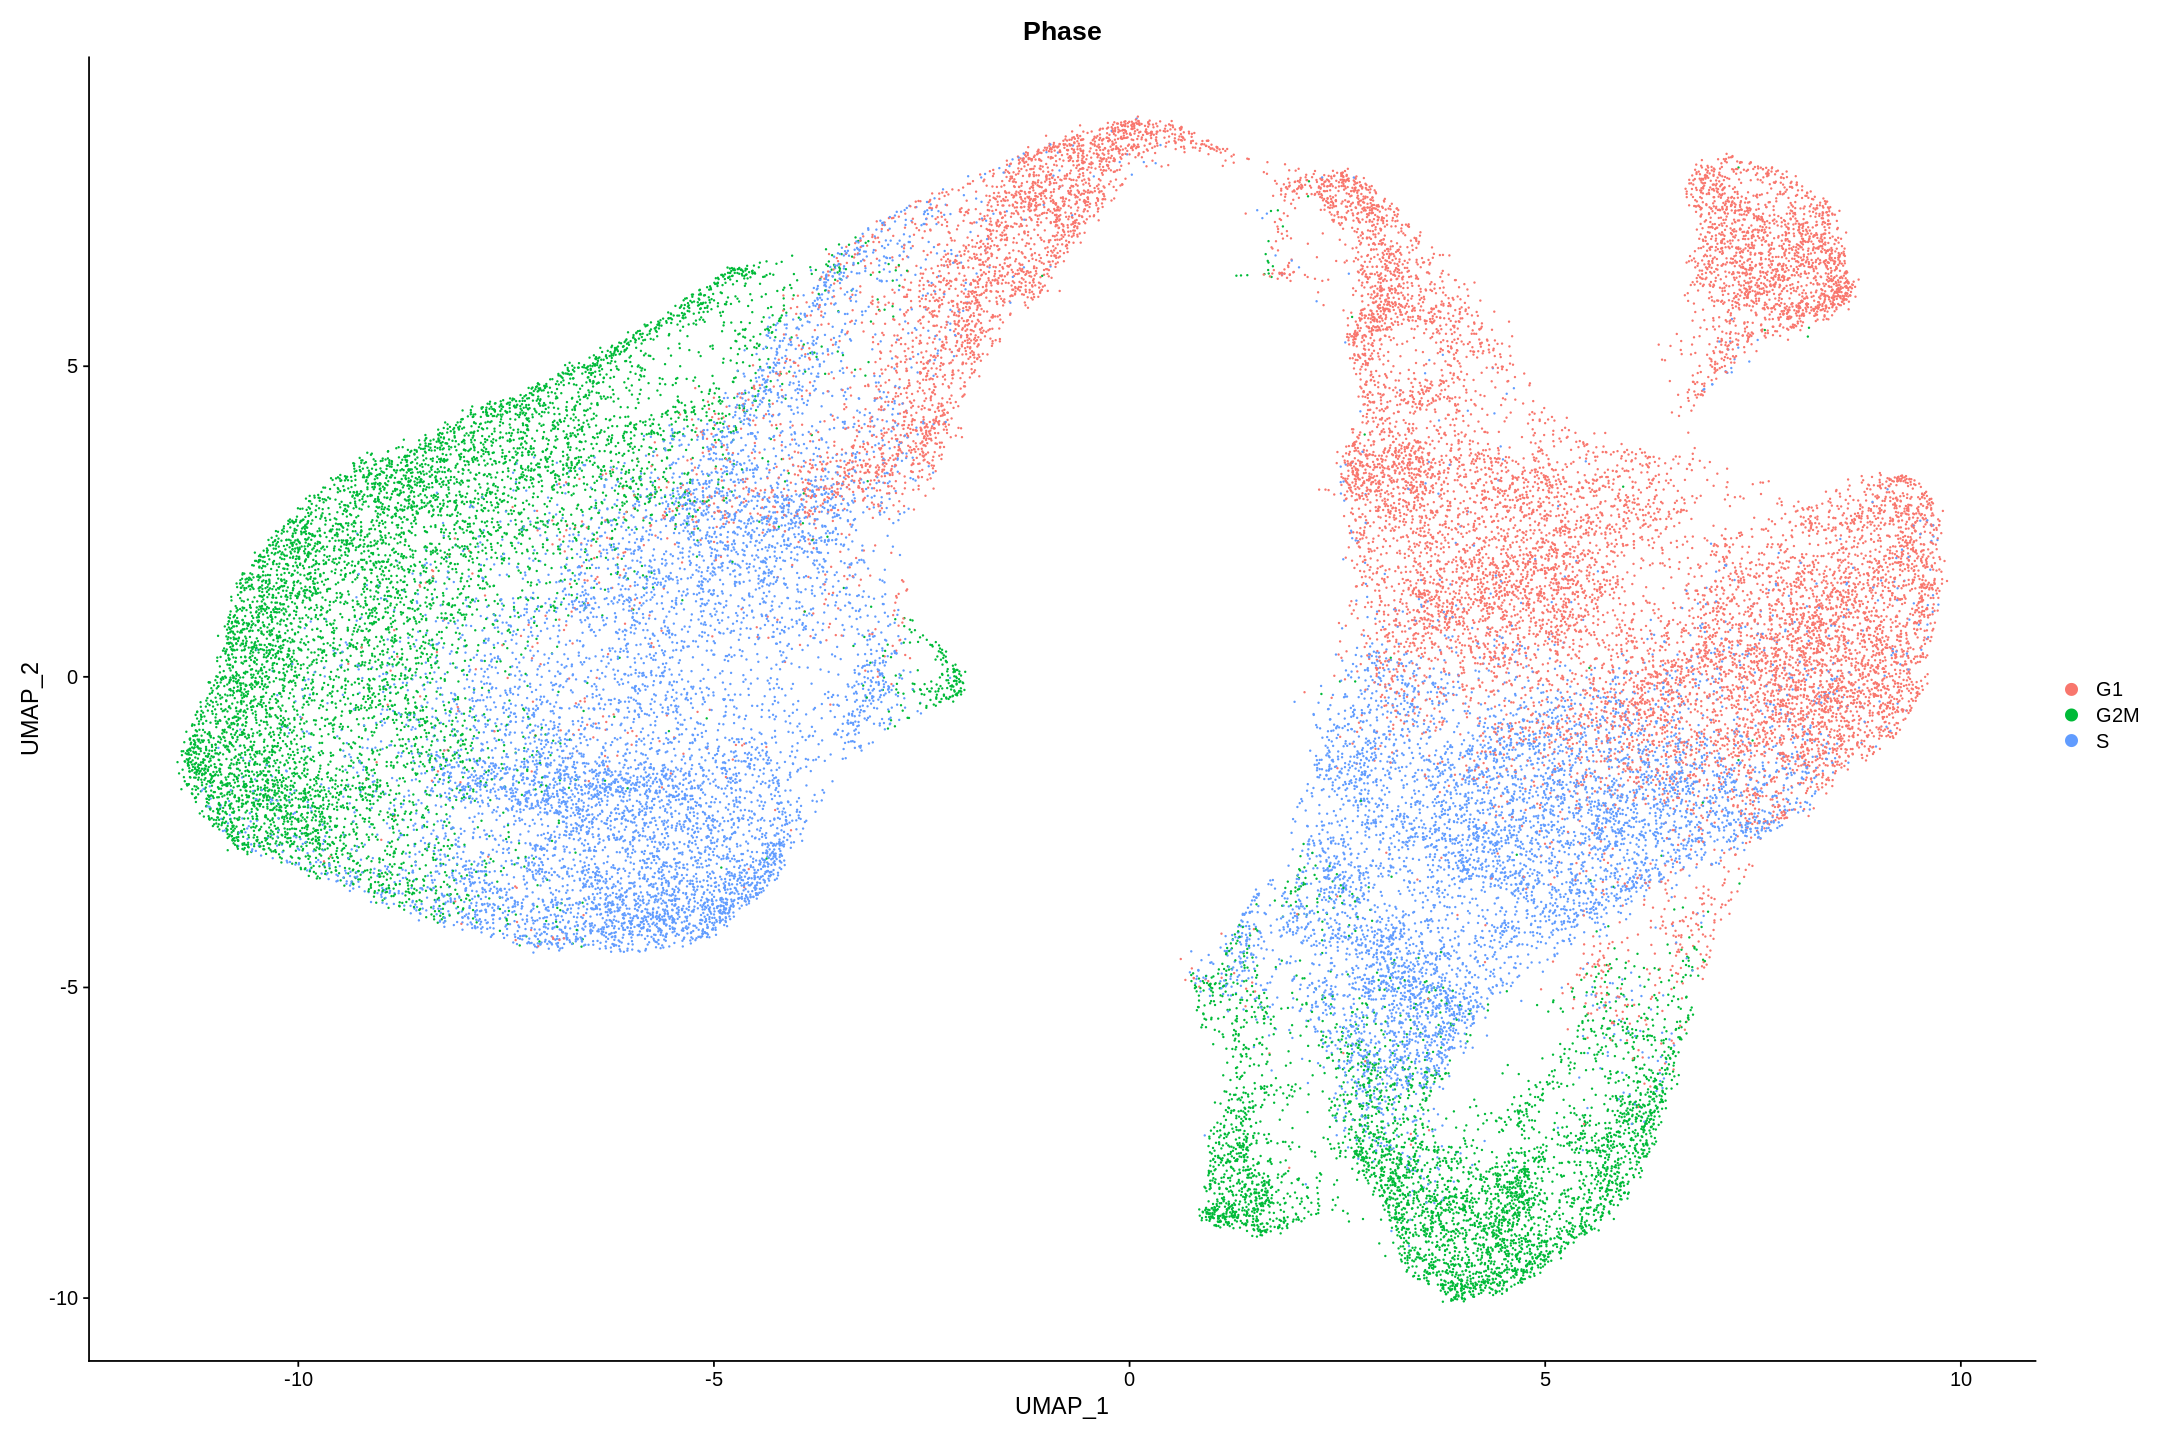

In [13]:
#Resolution min dist 0.2,spread 0.5
library(patchwork)
plot1 <- UMAPPlot(seurat, group.by="Phase")
plot1

In [14]:
#Remove CC from intergrated CSS
css_assay <- CreateSeuratObject(counts = t(seurat@reductions$css[[]]))
css_assay$S.Score <- seurat$S.Score
css_assay$G2M.Score <- seurat$G2M.Score
css_assay <- ScaleData(css_assay, vars.to.regress = c("S.Score", "G2M.Score"),features = rownames(css_assay))
seurat[["CSSccremoved"]] <- CreateDimReducObject(embeddings = t(as.matrix(css_assay@assays$RNA@scale.data)), key = "CSSccremoved_", assay = DefaultAssay(seurat))


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Regressing out S.Score, G2M.Score

Centering and scaling data matrix



In [15]:
#Find neighbors, find clusters, run UMAP
seurat <- FindNeighbors(seurat, reduction = "CSSccremoved", dims = 1:ncol(Embeddings(seurat, "CSSccremoved"))) %>% FindClusters(resolution = 0.6)
seurat <- RunUMAP(seurat, reduction="CSSccremoved", dims = 1:ncol(Embeddings(seurat, "CSSccremoved")), min.dist=0.4,spread=1.0)


Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 41059
Number of edges: 1329214

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8983
Number of communities: 15
Elapsed time: 10 seconds


10:33:18 UMAP embedding parameters a = 0.7669 b = 1.223

10:33:18 Read 41059 rows and found 47 numeric columns

10:33:18 Using Annoy for neighbor search, n_neighbors = 30

10:33:18 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:33:22 Writing NN index file to temp file /scratch/225984182.tmpdir/RtmpV6xDhr/file1260b23cd64e2

10:33:22 Searching Annoy index using 1 thread, search_k = 3000

10:33:35 Annoy recall = 100%

10:33:36 Commencing smooth kNN distance calibration using 1 thread

10:33:38 Initializing from normalized Laplacian + noise

10:33:40 Commencing optimization for 200 epochs, with 1700796 positive edges

10:34:25 Optimization finished



In [18]:
options(repr.plot.width=12, repr.plot.height=12)
seurat$dataset <- factor(seurat$dataset,
                                    # Change ordering manually
                  levels = c("HB4 D5" ,"HB4 D7","HB4 D11", "HB4 D16","HB4 D21","HB4 D30"))
plot1 <- UMAPPlot(seurat,group.by = "dataset", cols = met.brewer("Johnson", n = 6), pt.size = 0.1)+DarkTheme()+NoAxes()
plot1

In [17]:
saveRDS(seurat, file=paste(base_dir,"Seurat_object_HB4_D11_D16_D21_D30_removed_CC_integrated.rds",sep=""))
